## Importing Libraies & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('dataset/data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Handling Missing Values

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<AxesSubplot:>

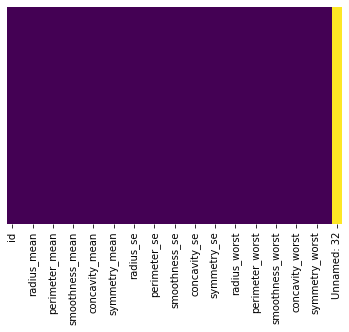

In [6]:
sns.heatmap(data.isnull() ,yticklabels=False ,cbar=False ,cmap='viridis')

In [7]:
data = data.drop(columns='Unnamed: 32' ,axis=1)

## Encoding (categrical to numerical)

In [8]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

data['diagnosis'] = encoder.fit_transform(data['diagnosis']) 
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Correlation

In [9]:
data.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

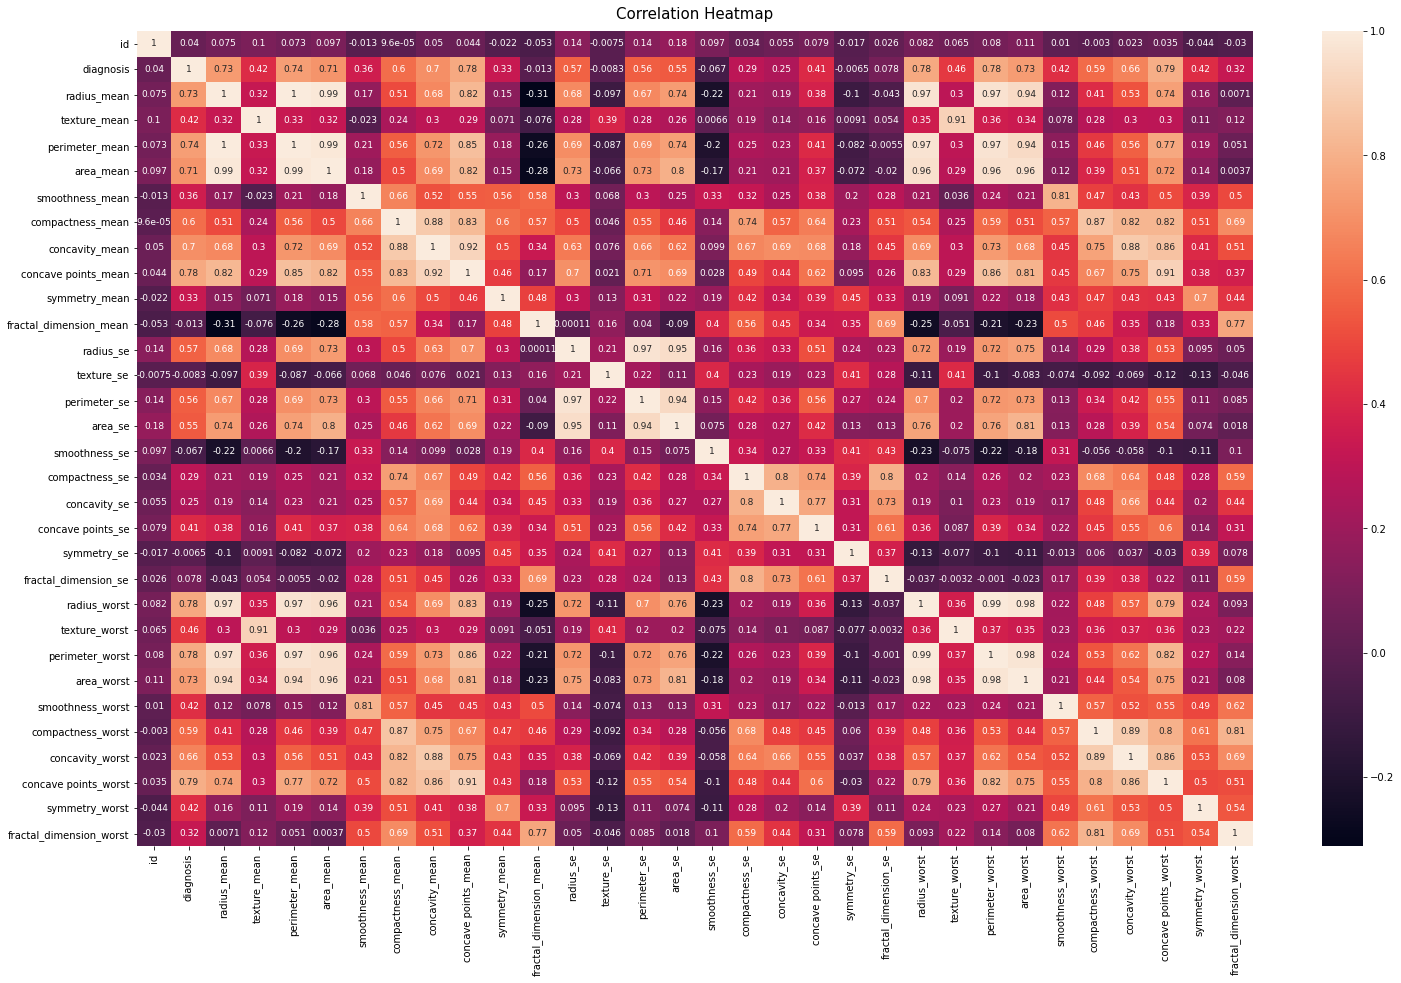

In [10]:
plt.figure(figsize=(25, 15))
corr_heatmap = sns.heatmap(data.corr(), annot=True, annot_kws={'size': 9})

# fixing fontsize
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 15}, pad=12)
plt.show()


## Scaling 

In [11]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

## PCA

In [12]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [13]:
x_pca = pca.transform(scaled_data)
scaled_data.shape ,x_pca.shape

((569, 32), (569, 2))

In [14]:
pca_data = pd.DataFrame(data=x_pca, columns=['First principle component', 'Second principle component'])

pca_data.head()

,First principle component,Second principle component
0,9.216724,2.136750
1,2.651244,-3.770741
2,5.900697,-1.010916
3,7.137376,10.315636
4,4.139263,-1.916891


## Visualizing PCA

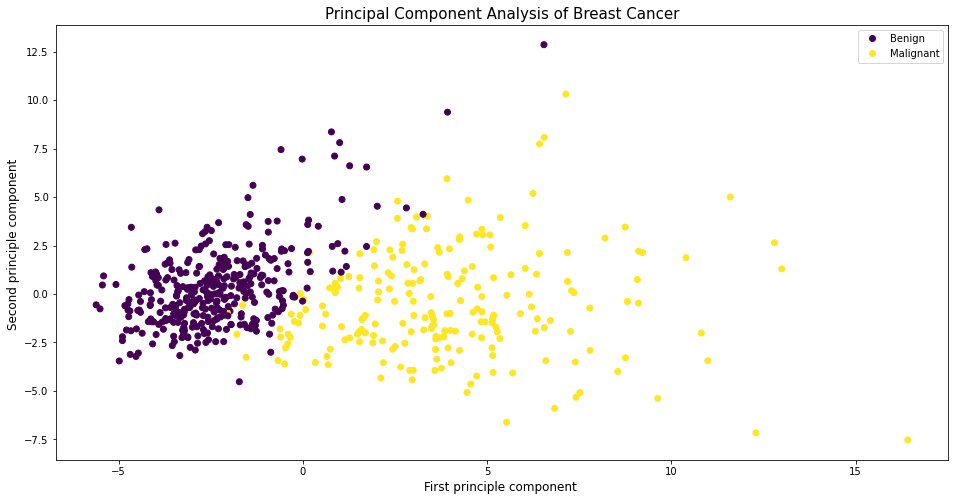

In [15]:
classes = ['Benign', 'Malignant']

plt.figure(figsize=(16, 8))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=data['diagnosis'])

plt.xlabel("First principle component ", fontsize=12)
plt.ylabel("Second principle component ", fontsize=12)
plt.title("Principal Component Analysis of Breast Cancer", fontsize=15)

plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

# Model 

In [16]:
X = data.iloc[: ,2:].values 
y = data.iloc[: ,1].values 

X.shape ,y.shape

((569, 30), (569,))

## Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape


((455, 30), (114, 30), (455,), (114,))

## Feature-Scaling

In [18]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [19]:
import tensorflow as tf 

In [20]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(16 ,kernel_initializer='uniform' ,activation='relu' ,input_dim=30))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(16, kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(1,kernel_initializer='uniform' ,activation='sigmoid'))

In [21]:
model.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])

## Training the model

In [22]:
model_trained = model.fit(X_train ,y_train ,batch_size=100 ,epochs=150)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/150
5/5 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.6242
Epoch 2/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.6374
Epoch 3/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.6374
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6484
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6813
Epoch 6/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6667 - accuracy: 0.7516
Epoch 7/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.8330
Epoch 8/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6325 - accuracy: 0.8923
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6066 - accura

## Predicting Test-Set results

In [23]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of model --> {}'.format(accuracy))

Accuracy of model --> 0.956140350877193


## Confusion Matrix

<AxesSubplot:>

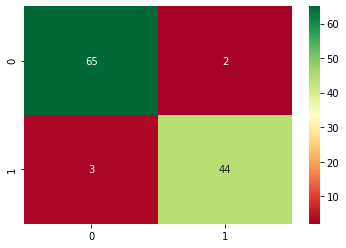

In [25]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.4g' ,cmap='RdYlGn')

## Plotting Analysis

In [26]:
def ann_plotter(model, plotType):
    plt.figure(figsize=(10, 5))
    if plotType == 'loss':
        param = 'loss'
    elif plotType == 'accuracy':
        param = 'accuracy'

    train = model.history[param]
    epoch = range(1, 151)

    sns.lineplot(epoch, train, label='Training ' + plotType.capitalize())

    plt.title('Training ' + plotType.capitalize())
    plt.xlabel('Epochs')
    plt.ylabel(plotType.capitalize())
    plt.legend()
    plt.show()


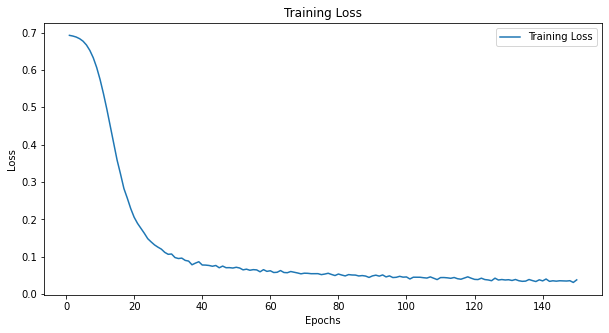

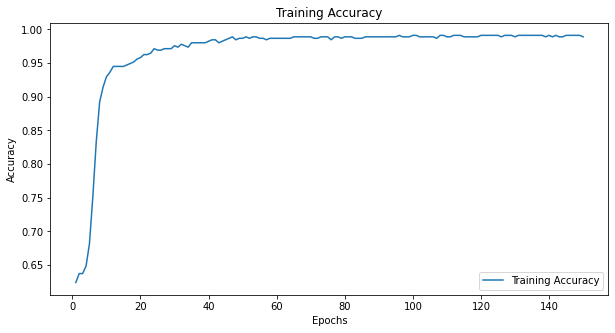

In [27]:
ann_plotter(model_trained ,'loss')
ann_plotter(model_trained, 'accuracy')